<a href="https://colab.research.google.com/github/Yuul-Jung/JW_RNN/blob/master/01_07_env_test_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**<< 참고문헌 및 출처>>**

1) 파이썬딥러닝케라스: https://tykimos.github.io/

#<1> 케라스 기본 개념

케라스에서 제공하는 시퀀스 모델로 원하는 레이어를 쉽게 구성할 수 있다.

다중 출력과 같이 좀 더 복잡한 모델을 구성하기 위해서는 케라스 함수 API를 사용하면 된다.

케라스 딥러닝 모델 작성 순서는 아래와 같다.

1. 데이터셋 생성 
 - 원본 데이터를 불러오거나 시물레이션 등을 통해 데이터 생성
 - 데이터로부터 훈련셋, 검증셋, 시험셋을 생성
 - 딥러닝 모델의 학습 및 평가를 할 수 있도록 포맷 변환

2. 모델 구성
 - 시퀀스 모델을 생성한 뒤 필요한 레이어를 추가하여 구성
 - 좀 더 복잡한 모델이 필요할 때는 케라스 함수 API를 사용

3. 모델 학습과정 설정 : compile() 함수를 사용
 - 학습하기 전에 학습에 대한 설정을 수행
 - 손실 함수 및 최적화 방법을 정의

4. 모델 학습 : fit() 함수를 사용
 - 구성한 모델을 훈련셋으로 학습

5. 학습과정 모니터링
 - 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정
 - 반복 횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단

6. 모델 평가 : evaluate() 함수를 사용
 - 준비된 시험셋으로 학습한 모델을 평가

7. 모델 사용 : predict() 함수를 사용
 - 임의의 임력으로 모델에서 출력 도출

In [ ]:
#################################################################################
# 손글씨 영상 분류하는 모델을 구현
# 가로셀 28, 세로셀 28 이미지를 1차원의 784 벡터로 변환 후 학습 및 평가
#################################################################################

# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=5, batch_size=32)

# 5. 학습과정 살펴보기
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['accuracy'])

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

# 7. 모델 사용하기
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Epoch 1/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.6927 - accuracy: 0.8234
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.3474 - accuracy: 0.9027
Epoch 3/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2980 - accuracy: 0.9162
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.2693 - accuracy: 0.9241
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2481 - accuracy: 0.9305
## training loss and acc ##
[0.6926682615756988, 0.3474385932882627, 0.2980140088995298, 0.2692863485296567, 0.24813596321642398]
[0.82336664, 0.9027333, 0.91625, 0.9241, 0.93053335]
10000/10000 [==============================] - 0s 22us/step
## evaluation loss and_metrics ##
[0.23152339048683643, 0.9340000152587891]
## yhat ##
[[3.4158089e-04 7.9409361e-08 2.7128935e-04 1.4280526e-03 3.2774460e-06
  4.8226982e-

#딥러닝 기본모델 구동 확인

In [ ]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

# 1. 데이터셋 생성하기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test.reshape(10000, 784).astype('float32') / 255.0
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

# 2. 모델 구성하기
model = Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

# 3. 모델 학습과정 설정하기
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# 4. 모델 학습시키기
model.fit(X_train, Y_train, epochs=5, batch_size=32)

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(X_test, Y_test, batch_size=32)

print('loss_and_metrics : ' + str(loss_and_metrics))

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.6749 - accuracy: 0.8244
Epoch 2/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.3459 - accuracy: 0.9036
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2968 - accuracy: 0.9156
Epoch 4/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2675 - accuracy: 0.9245
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
loss_and_metrics : [0.23371364426612853, 0.9348999857902527]


# 딥러닝 모델 가시화 기능 확인

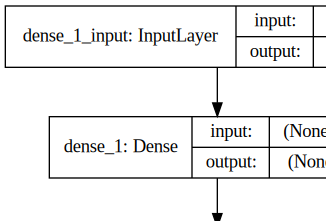

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

# 딥러닝 모델 저장 기능 확인

케라스 딥러닝 모델 저장 기능 확인, 로컬 디렉토리에 'mnist_mlp_model.h5'파일이 생성되면 정상적으로 작동

In [ ]:
from keras.models import load_model

model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

# 딥러닝 엔진 바꾸기

"beckend": "tensorflow"

"beckend": "theano"

<< 참고문헌 및 출처>>

1) 파이썬딥러닝케라스: https://tykimos.github.io/

#<2> 딥러닝 개념 파악

딥러닝 모델을 학습시키려면 데이터셋이 필요하다.

해결하고자 하는 문제 및 만들고자 하는 모델에 따라 데이터셋 설계도 달라진다.

#1.. 데이터 정의 : 훈련셋, 검증셋, 시험셋

1-0. 훈련셋, 검증셋, 시험셋

- <가정> 수능 볼 학생 3명이 있다. 이 세명 중 수능을 가장 잘 볼지 알아맞혀라. (단, 모의고사 5회분과 작년 수능문제 1회분을 가지고 있다.)
 - 모의고사 5회분 : 훈련셋
 - 작년 수능 문제 : 시험셋
 - 학생 3명 : 모델 3개
 - 올해 수능 문제 : 실제 데이터(아직 보지 못한 데이터, Unseen data)

# 경우 1 (불가능)

1-1. 경우 1 (불가능)
- <설정> 
 - 훈련셋 : 모의고사 1~5회분, 작년수능문제
 - 시험셋 : 올해 수능 문제
- <결론> 올해 수능 문제를 수능 전에 알아낼 수 없으므로 (불가능)

# 경우 2 (훈련셋과 시험셋만 있음)

1-2. 경우 2 (훈련셋과 시험셋만 있음)
- <설정> 
 - 훈련셋 : 모의고사 1~5회분
 - 시험셋 : 작년 수능 문제(공정한 평가를 위해 작년 수능 문제를 훈련셋에 포함 시키면 안됨)
- <결론> 작년 수능 문제로 점수가 높다고 해서 올해 수능도 점수가 높을 지 장담은 못하지만 그나마 해볼 수 있는 평가 방법

# 경우 3 (훈련셋, 검증셋, 시험셋이 있음)

1-3. 경우 3 (훈련셋, 검증셋, 시험셋이 있음)
- <이유> 학생들이 스스로 학습상태를 확인하고 학습방법을 바꾸거나 학습을 중단하는 시점을 정하도록 검증셋을 활용
- <설정>
 - 훈련셋 : 모의고사 1~4회분
 - 검증셋 : 모의고사 5회분
 - 시험셋 : 작년 수능 문제
- <효과> 
 - (1) 학습 방법을 바꾼 후 훈련셋으로 학습을 해보고 검증셋으로 평가해 볼 수 있다. 검증셋으로 가장 높은 평가를 받은 학습 방법이 최적의 학습 방법이라고 생각할 수 있다. 이러한 학습 방법을 결정하는 파라미터를 하이퍼파라미터(hyperparameter)라고하고 최적의 학습 방법을 찾기 위해 하이퍼파라미터를 조정(하이퍼파라미터 튜닝)이라 한다. 검증셋이 있다면 스스로 평가하면서 적절한 학습 방법을 찾아볼 수 있다.
 - (2) 얼마 정도 반복 학습이 좋을 지를 정하기 위해서 검증셋을 사용할 수 있다. 훈련셋을 몇 번 반복해서 학습할 것인가를 정하는 것이 에포크(epochs)이며, 초기에는 에포크가 증가될수록 검증셋의 평가 결과도 좋아진다. 에포크를 계속 증가시키다보면 더 이상 검증셋의 평가는 높아지지 않고 오버피팅이 되어 오히려 틀린 개수가 많아진다. 이 시점이 적정 반복횟수로 보고 학습을 중단한다. 이를 조기 종료(early stopping)라고 한다. 검증셋이 있다면 학습 중단 시점을 정할 수 있다.

# 경우 4 (훈련셋을 돌려가며 교차검증)

**1-4. 경우 4 (훈련셋을 돌려가며 교차검증)**
- <이유> 모의고사 5회로만 검증셋을 사용할 경우 객관적인 평가가 이루어졌다고 보기 어렵다. 이때 사용하는 것이 교차검증(cross-validation)이다.
 - 모의고사 5회에서 출제가 되지 않는 분야가 있거나 
 - 작년수능이나 홀해 수능문제와 많이 다를 수도 있고
 - 난이도 및 범위가 다를 수 있기때문이다. 
- <설정> 
 - 모의고사 1~4회를 학습한 뒤 모의고사 5회로 검증, 
 - 학습된 상태를 초기화한 후 다시 모의고사 1~3회, 5회로 학습한 뒤 모의고사 4회로 검증
 - 학습된 상태를 초기화한 후 다시 모의고사 1~2회와 4,5회로 학습한 뒤 모의고사 3회로 검증
 - 계속해서 모의고사 1회까지 검증한다.
- <결론> 
 - 다섯번의 검증 결과에 대한 평균을 내어 이 평균값, 분산으로 성능을 정의
 - 검증셋이 다르다고 해서 결과가 차이나는 것보다 평균이 낮더라도 안정적인 결과를 내는 것이 더 좋은 모델일 수 있음
- <문제점>
 - 교차검증은 계산량이 많기 때문에 데이터 수가 많지 않을 때 사용하며, 딥러닝 모델에서는 대량의 데이터를 사용하므로 잘 사용하지 않는다고 함 

#2.. 모델 구성


- 레이어를 통해 신경망 모델을 구성
 - 다층 퍼셉트론 신경망 모델
 - 컨볼루션 신경망 모델
 - 순환 신경망 모델

#3.. 학습과정이란

# 3.. 학습과정 사용